In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

### Sector totals

In [2]:
sector_totals = pd.read_csv('../data/sector_emissions.csv')
sector_totals['GHG_share'] = sector_totals['GHG'] / sector_totals['GHG'].sum()
sector_totals

,sector_title,GHG,GHG_share
0,AFOLU,6.411883e+09,0.121358
1,Buildings,3.198303e+09,0.060535
2,Energy,2.066407e+10,0.391111
3,Industry,1.202055e+10,0.227514
4,Transport,8.109179e+09,0.153483
5,Waste,2.430252e+09,0.045998


### Paper totals

In [3]:
df = pd.read_feather('../data/annotated_data.feather')

def paper_share(sector_titles, df):
    sector_papers = []

    for s in sector_titles:
        df_col = [x for x in df.columns if s in x][0]
        n = df[df[df_col]>0.5].shape[0]
        sector_papers.append({
            "sector_title": s,
            "n_papers": n
        })    
    sector_specific = (df[sectors].max(axis=1) > 0.5).sum()
    sector_papers = pd.DataFrame.from_dict(sector_papers)
    sector_papers["share_papers"] = sector_papers["n_papers"] / sector_specific
    sector_papers["share_papers_100"] = sector_papers["n_papers"] / sector_papers["n_papers"].sum()
    return sector_papers   
    
sectors = [x for x in df.columns if re.match('^8 -',x)]

sector_papers = paper_share(sectors, df)
sector_papers

,sector_title,n_papers,share_papers,share_papers_100
0,8 - 01. AFOLU,11490,0.140134,0.122435
1,8 - 02. Buildings,6756,0.082397,0.071990
2,8 - 03. Industry,5056,0.061664,0.053875
3,8 - 04. Energy,26243,0.320064,0.279639
4,8 - 05. Transport,11818,0.144134,0.125930
5,8 - 06. Waste,1563,0.019063,0.016655
6,8 - 15. Cross-sectoral,30920,0.377105,0.329476


In [4]:
sector_papers = paper_share(sector_totals.sector_title, df)
sector_papers

,sector_title,n_papers,share_papers,share_papers_100
0,AFOLU,11490,0.140134,0.182595
1,Buildings,6756,0.082397,0.107364
2,Energy,26243,0.320064,0.417045
3,Industry,5056,0.061664,0.080348
4,Transport,11818,0.144134,0.187808
5,Waste,1563,0.019063,0.024839


## Policy totals

In [5]:
pol_df = pd.read_csv('../data/policy_database.csv')

def pol_share(sector_titles, df):
    sector_pols = []
    for s in sector_titles:
        n = df[df[s]>0.5].shape[0]
        sector_pols.append({
            "sector_title": s,
            "n_policies": n
        })    
    sector_specific = (df[sector_totals.sector_title].max(axis=1) > 0.5).sum()
    sector_pols = pd.DataFrame.from_dict(sector_pols)
    sector_pols["share_policies"] = sector_pols["n_policies"] / sector_specific
    sector_pols["share_policies_100"] = sector_pols["n_policies"] / sector_pols["n_policies"].sum()
    return sector_pols

sector_pols = pol_share(sector_totals.sector_title, pol_df)
sector_pols

,sector_title,n_policies,share_policies,share_policies_100
0,AFOLU,888,0.159942,0.111937
1,Buildings,1303,0.234690,0.164251
2,Energy,2791,0.502702,0.351822
3,Industry,1009,0.181736,0.127190
4,Transport,1764,0.317723,0.222362
5,Waste,178,0.032061,0.022438


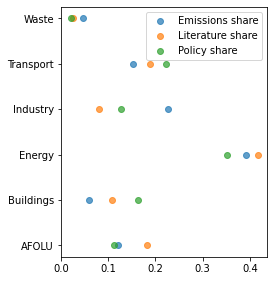

In [6]:
sector_df = sector_totals.merge(sector_papers).merge(sector_pols)
fig, ax = plt.subplots(figsize=(7.4/2,4.6))

ax.scatter(sector_df["GHG_share"], sector_df.index, label="Emissions share", alpha=0.7)
#ax.scatter(sector_df["share_papers"], sector_df.index, label="Literature share", alpha=0.7)
#ax.scatter(sector_df["share_policies"], sector_df.index, label="Policy share", alpha=0.7)

ax.scatter(sector_df["share_papers_100"], sector_df.index, label="Literature share", alpha=0.7)
ax.scatter(sector_df["share_policies_100"], sector_df.index, label="Policy share", alpha=0.7)

ax.set_yticks(sector_df.index)
ax.set_yticklabels(sector_df["sector_title"])
ax.legend()

ax.set_xlim(xmin=0)

plt.savefig("../figures/sector_shares.pdf", bbox_inches="tight")

In [7]:
sector_df

,sector_title,GHG,GHG_share,n_papers,share_papers,share_papers_100,n_policies,share_policies,share_policies_100
0,AFOLU,6.411883e+09,0.121358,11490,0.140134,0.182595,888,0.159942,0.111937
1,Buildings,3.198303e+09,0.060535,6756,0.082397,0.107364,1303,0.234690,0.164251
2,Energy,2.066407e+10,0.391111,26243,0.320064,0.417045,2791,0.502702,0.351822
3,Industry,1.202055e+10,0.227514,5056,0.061664,0.080348,1009,0.181736,0.127190
4,Transport,8.109179e+09,0.153483,11818,0.144134,0.187808,1764,0.317723,0.222362
5,Waste,2.430252e+09,0.045998,1563,0.019063,0.024839,178,0.032061,0.022438


## Calculate regional shares

Africa
Asia
Europe
North America
Oceania
South America


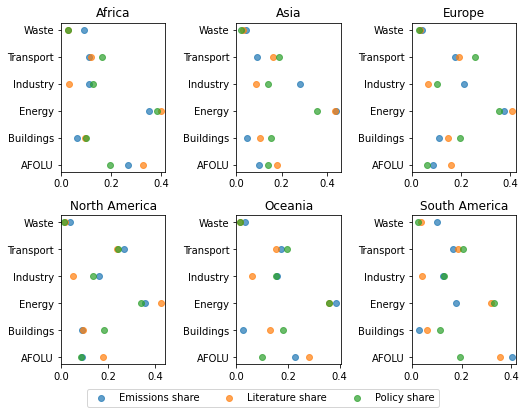

In [8]:
places = pd.read_feather('../data/places.feather')
sector_region_totals = pd.read_csv('../data/sector_region_emissions.csv')

fig, axs = plt.subplots(2,3, figsize=(7.4,5.5))
for i, (name, group) in enumerate(places.groupby('continent')):
    print(name)
    sector_totals = sector_region_totals[sector_region_totals['continent']==name].copy()
    sector_totals['GHG_share'] = sector_totals['GHG'] / sector_totals['GHG'].sum()
    
    sector_papers = paper_share(sector_totals.sector_title, df[df['id'].isin(group['doc_id'])])
    sector_pols = pol_share(sector_totals.sector_title, pol_df[pol_df['continent']==name])
    
    sector_df = sector_totals.merge(sector_papers).merge(sector_pols)
    ax = axs[i//3, i%3]

    ax.scatter(sector_df["GHG_share"], sector_df.index, label="Emissions share" if i==0 else None, alpha=0.7)
    #ax.scatter(sector_df["share_papers"], sector_df.index, label="Literature share", alpha=0.7)
    #ax.scatter(sector_df["share_policies"], sector_df.index, label="Policy share", alpha=0.7)

    ax.scatter(sector_df["share_papers_100"], sector_df.index, label="Literature share" if i==0 else None, alpha=0.7)
    ax.scatter(sector_df["share_policies_100"], sector_df.index, label="Policy share" if i==0 else None, alpha=0.7)

    ax.set_yticks(sector_df.index)
    ax.set_yticklabels(sector_df["sector_title"])
    if i==0:
        pass
        #ax.legend()

    ax.set_xlim(xmin=0)
    ax.set_title(name)

fig.legend(ncols=3, bbox_to_anchor=(0.5, -0.05),loc = 'lower center')

fig.tight_layout()

plt.savefig("../figures/regional_sector_shares.pdf", bbox_inches="tight")

In [9]:
sector_emissions = pd.read_csv('../data/country_sector_emissions.csv').rename(columns={'iso':'country_code3'})
sector_titles = list(sector_emissions['sector_title'].unique())
sector_emissions

,sector_title,country_code3,GHG,country_GHG_share,global_GHG_share
0,AFOLU,AFG,1.537675e+07,0.480612,0.002398
1,AFOLU,AGO,1.061176e+07,0.152614,0.001655
2,AFOLU,ALB,2.378313e+06,0.301984,0.000371
3,AFOLU,ARE,1.999350e+06,0.007449,0.000312
4,AFOLU,ARG,1.510025e+08,0.370276,0.023550
...,...,...,...,...,...
1230,Waste,WSM,4.295631e+04,0.069005,0.000018
1231,Waste,YEM,6.836642e+06,0.191453,0.002813
1232,Waste,ZAF,2.593220e+07,0.046803,0.010671
1233,Waste,ZMB,2.872045e+06,0.109196,0.001182


In [10]:
sector_policies = pd.read_csv('../data/pdb_countries.csv')
sector_policies = sector_policies[['country_code3']+sector_titles].melt(id_vars='country_code3', var_name='sector_title', value_name='n_policy')
sector_policies['country_policy_share'] = sector_policies['n_policy'] / sector_policies.groupby('country_code3')['n_policy'].transform(sum)
sector_policies.query('country_code3=="AFG"')

/tmp/ipykernel_119437/2846765415.py:3: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  sector_policies['country_policy_share'] = sector_policies['n_policy'] / sector_policies.groupby('country_code3')['n_policy'].transform(sum)


,country_code3,sector_title,n_policy,country_policy_share
0,AFG,AFOLU,2,0.2
202,AFG,Buildings,0,0.0
404,AFG,Energy,6,0.6
606,AFG,Industry,0,0.0
808,AFG,Transport,1,0.1
1010,AFG,Waste,1,0.1


In [11]:
places = pd.read_feather('../data/places.feather')
places.head()

,feature_code,feature_class,country_code3,lat,lon,name,admin1_code,admin1_name,admin2_code,admin2_name,...,search_name,start_char,end_char,city_id,city_name,doc_id,country_conf,place_name,continent,word
0,PCLI,A,CMR,6.00000,12.50000,Republic of Cameroon,00,None,None,None,...,Cameroon,547.0,555.0,None,None,W999667810,NaN,None,Africa,None
1,PCLI,A,ITA,42.83333,12.83333,Italian Republic,00,None,None,None,...,Italy,91.0,96.0,None,None,W999485533,NaN,None,Europe,None
2,PCLI,A,ITA,42.83333,12.83333,Italian Republic,00,None,None,None,...,Italy,845.0,850.0,None,None,W999485533,NaN,None,Europe,None
3,PCLI,A,MAR,28.50000,-10.00000,Kingdom of Morocco,00,None,None,None,...,Morocco,122.0,129.0,None,None,W998175845,NaN,None,Africa,None
4,PCLI,A,MAR,28.50000,-10.00000,Kingdom of Morocco,00,None,None,None,...,Morocco,203.0,210.0,None,None,W998175845,NaN,None,Africa,None


In [12]:
sectors = [x for x in df.columns if re.match('^8 -', x) and "Cross" not in x]
sector_papers = pd.DataFrame()
for country, group in places.groupby('country_code3'):
    sub_df = df[df['id'].isin(group['doc_id'])]
    c_sector_papers = []
    for s in sectors:
        n = sub_df[sub_df[s]>0.5].shape[0]
        c_sector_papers.append({
            'country_code3': country,
            'sector_title': s.split(". ")[1].split()[0],
            'n_papers': n
        })
    c_sector_specific = (sub_df[sectors].max(axis=1) > 0.5).sum()
    c_sector_papers = pd.DataFrame.from_dict(c_sector_papers)
    c_sector_papers['share_papers'] = c_sector_papers['n_papers'] / c_sector_specific
    c_sector_papers['share_papers_100'] = c_sector_papers['n_papers'] / c_sector_papers['n_papers'].sum()
    sector_papers = pd.concat([sector_papers, c_sector_papers])
    
sector_papers.query('country_code3=="AFG"')


,country_code3,sector_title,n_papers,share_papers,share_papers_100
0,AFG,AFOLU,7,0.304348,0.28
1,AFG,Buildings,0,0.000000,0.00
2,AFG,Industry,2,0.086957,0.08
3,AFG,Energy,11,0.478261,0.44
4,AFG,Transport,4,0.173913,0.16
5,AFG,Waste,1,0.043478,0.04


In [13]:
cdf = sector_papers.merge(sector_policies).merge(sector_emissions).merge(places[['country_code3','continent']].dropna().drop_duplicates())
cdf

,country_code3,sector_title,n_papers,share_papers,share_papers_100,n_policy,country_policy_share,GHG,country_GHG_share,global_GHG_share,continent
0,AFG,AFOLU,7,0.304348,0.28,2,0.200000,1.537675e+07,0.480612,0.002398,Asia
1,AFG,Buildings,0,0.000000,0.00,0,0.000000,3.220538e+05,0.010066,0.000101,Asia
2,AFG,Industry,2,0.086957,0.08,0,0.000000,4.310674e+06,0.134733,0.000359,Asia
3,AFG,Energy,11,0.478261,0.44,6,0.600000,4.447674e+06,0.139015,0.000215,Asia
4,AFG,Transport,4,0.173913,0.16,1,0.100000,1.932192e+06,0.060392,0.000238,Asia
...,...,...,...,...,...,...,...,...,...,...,...
1097,ZWE,Buildings,0,0.000000,0.00,1,0.055556,2.894587e+06,0.089345,0.000905,Africa
1098,ZWE,Industry,1,0.052632,0.05,2,0.111111,3.097058e+06,0.095595,0.000258,Africa
1099,ZWE,Energy,6,0.315789,0.30,5,0.277778,8.006709e+06,0.247138,0.000387,Africa
1100,ZWE,Transport,1,0.052632,0.05,6,0.333333,2.821830e+06,0.087100,0.000348,Africa


In [14]:
sector_df

,sector_title,continent,GHG,GHG_share,n_papers,share_papers,share_papers_100,n_policies,share_policies,share_policies_100
0,AFOLU,South America,1.042582e+09,0.401075,635,0.278265,0.355742,108,0.259615,0.194595
1,Buildings,South America,7.876210e+07,0.030299,106,0.046450,0.059384,62,0.149038,0.111712
2,Energy,South America,4.588437e+08,0.176515,571,0.250219,0.319888,184,0.442308,0.331532
3,Industry,South America,3.269165e+08,0.125763,72,0.031551,0.040336,72,0.173077,0.129730
4,Transport,South America,4.310171e+08,0.165810,331,0.145048,0.185434,115,0.276442,0.207207
5,Waste,South America,2.613441e+08,0.100538,70,0.030675,0.039216,14,0.033654,0.025225


In [15]:
# cdf = pd.read_csv('../data/country_studies.csv')
# cdf = cdf[cdf["sector"].str.contains("\.")]
# cdf["sector"] = [x.split(". ")[1] for x in cdf["sector"]]

# s_columns = [f"{x}_pubs" for x in sectors]
# s_share_columns = [f"{x}_pub_share" for x in sectors]
# s_dict = dict(zip(sectors,s_columns))

# country_sector_studies = (cdf
#                           .groupby(["country","sector"])["n_studies"]
#                           .sum()
#                           .reset_index()
#                           .pivot_table(index="country",columns="sector", values="n_studies")
#                           .reset_index()
#                           .drop(columns="Cross-sectoral")
#                           .rename(columns=s_dict)
#                           .rename(columns={"country":"iso"})
#                          )

In [16]:
cdf

,country_code3,sector_title,n_papers,share_papers,share_papers_100,n_policy,country_policy_share,GHG,country_GHG_share,global_GHG_share,continent
0,AFG,AFOLU,7,0.304348,0.28,2,0.200000,1.537675e+07,0.480612,0.002398,Asia
1,AFG,Buildings,0,0.000000,0.00,0,0.000000,3.220538e+05,0.010066,0.000101,Asia
2,AFG,Industry,2,0.086957,0.08,0,0.000000,4.310674e+06,0.134733,0.000359,Asia
3,AFG,Energy,11,0.478261,0.44,6,0.600000,4.447674e+06,0.139015,0.000215,Asia
4,AFG,Transport,4,0.173913,0.16,1,0.100000,1.932192e+06,0.060392,0.000238,Asia
...,...,...,...,...,...,...,...,...,...,...,...
1097,ZWE,Buildings,0,0.000000,0.00,1,0.055556,2.894587e+06,0.089345,0.000905,Africa
1098,ZWE,Industry,1,0.052632,0.05,2,0.111111,3.097058e+06,0.095595,0.000258,Africa
1099,ZWE,Energy,6,0.315789,0.30,5,0.277778,8.006709e+06,0.247138,0.000387,Africa
1100,ZWE,Transport,1,0.052632,0.05,6,0.333333,2.821830e+06,0.087100,0.000348,Africa


0.9187374856642303
0.3608631249257695
0.8672749030502289
0.5950959655733491
0.5940792141027017
0.3104125201950552


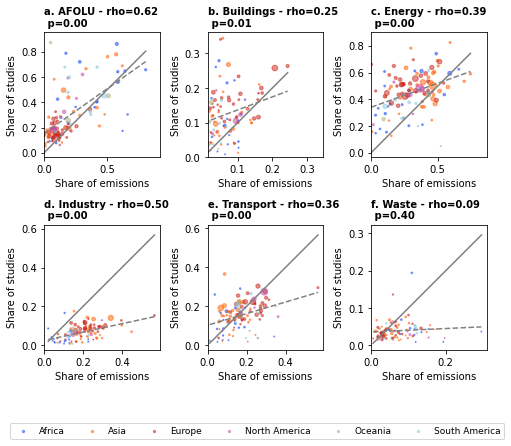

In [17]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
from cycler import cycler
import numpy as np
from matplotlib import gridspec
import string

CB_8 = ["#1845fb", "#ff5e02", "#c91f16", "#c849a9", "#adad7d", "#86c8dd", "#578dff", "#656364"]

mpl.rcParams['axes.prop_cycle'] = cycler(color=CB_8)

fig = plt.figure(figsize=(7.5,6.3))

gs = gridspec.GridSpec(3,3, height_ratios=[1,1,0.01])

for i, (s, group) in enumerate(cdf.groupby('sector_title')):
    group = group.dropna()
    group = group[group['n_papers']/group['share_papers']>20]
    pubs = group['share_papers']
    ghgs = group['country_GHG_share']
    corr = pearsonr(pubs, ghgs)
    
    ax = fig.add_subplot(gs[i])
    ax.set_title(
        f"{string.ascii_lowercase[i]}. {s} - rho={corr[0]:.2f}\n p={corr[1]:.2f}",
        fontsize=10, fontweight='bold', loc='left'
    )
    ax.set_xlabel("Share of emissions")
    ax.set_ylabel("Share of studies")
    
    for reg, cgroup in group.groupby('continent'):
        ax.scatter(
            cgroup['country_GHG_share'], cgroup['share_papers'], 
            #s=5+np.log(pub_n),
            s=np.sqrt(cgroup['n_papers']),
            #s = pub_n,
            alpha=0.5,
            label=reg
        )   
        
    lm = LinearRegression()
    lm.fit(ghgs.values.reshape(ghgs.size,1), pubs)
    x = np.linspace(min(ghgs),max(ghgs),10)
    y_hat = lm.intercept_ + x*lm.coef_
    ax.plot(x,y_hat, color="grey", ls="--")
    ax.plot(x,x, color="grey")
    
    max_value = max([ax.get_xlim()[1],ax.get_ylim()[1]])
    ax.axis("equal")
    ax.set_xlim(0,max_value)
    ax.set_ylim(0,max_value)
    #ax.set_xticks(ax.get_yticks())
    print(max_value)
    
#

cax = fig.add_subplot(gs[2,:])
for reg, cgroup in group.groupby('continent'):
    cax.scatter(
        [],[], 
        #s=5+np.log(pub_n),
        5,
        #s = pub_n,
        alpha=0.5,
        label=reg
    ) 
#cax.legend(fontsize=8, bbox_to_anchor=(1,0.75), ncol=6)
cax.legend(fontsize=9,bbox_to_anchor=(1.05,0.5), ncol=6)
cax.axis('off')
    
fig.tight_layout()

plt.savefig("../figures/sector_shares_countries.pdf", bbox_inches="tight")

In [18]:
cdf[cdf['country_code3']=='CHN']

,country_code3,sector_title,n_papers,share_papers,share_papers_100,n_policy,country_policy_share,GHG,country_GHG_share,global_GHG_share,continent
186,CHN,AFOLU,825,0.155866,0.140497,42,0.148936,8.669205e+08,0.056481,0.135205,Asia
187,CHN,Buildings,513,0.096920,0.087364,34,0.120567,5.714737e+08,0.037232,0.178680,Asia
188,CHN,Industry,748,0.141319,0.127384,58,0.205674,5.261425e+09,0.342787,0.437702,Asia
189,CHN,Energy,2650,0.500661,0.451294,101,0.358156,7.132608e+09,0.464696,0.345170,Asia
190,CHN,Transport,1015,0.191763,0.172854,44,0.156028,1.041288e+09,0.067841,0.128409,Asia
191,CHN,Waste,121,0.022860,0.020606,3,0.010638,4.752672e+08,0.030964,0.195563,Asia


In [19]:
cdf[cdf['country_code3']=='USA']

,country_code3,sector_title,n_papers,share_papers,share_papers_100,n_policy,country_policy_share,GHG,country_GHG_share,global_GHG_share,continent
1036,USA,AFOLU,1393,0.183338,0.162981,28,0.049645,4.394635e+08,0.075176,0.068539,North America
1037,USA,Buildings,801,0.105422,0.093717,113,0.200355,5.558107e+08,0.095079,0.173783,North America
1038,USA,Industry,437,0.057515,0.051129,74,0.131206,8.716933e+08,0.149115,0.072517,North America
1039,USA,Energy,3667,0.482627,0.429039,210,0.372340,2.134174e+09,0.365080,0.103279,North America
1040,USA,Transport,2091,0.275204,0.244647,137,0.242908,1.698482e+09,0.290549,0.209452,North America
1041,USA,Waste,158,0.020795,0.018486,2,0.003546,1.461406e+08,0.024999,0.060134,North America
